# Classify American Sign Language (ASL) 

## Import libraries

In [6]:
import cv2 as cv
import numpy as np
import sklearn as skl
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import scipy as cp
import matplotlib.pyplot as plt
import os
import pandas as pd



Define lower and upper boundaries for skincare detection *(!OBS! not used atm)*

In [7]:
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

Some stuff we tried to do some skin color detection 

In [ ]:
#Load images
currentLocation = os.getcwd()
imgB = cv.imread(currentLocation + '/data/aBright.jpg')
imgD = cv.imread(currentLocation + '/data/aYellow.jpg')
imgS =  cv.imread(currentLocation + '/data/aSilhouette.jpg')
imgTB = cv.imread(currentLocation + '/data/aTopBright.jpg')


kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))

#Convert to HSV
hsvBright = cv.cvtColor(imgB, cv.COLOR_BGR2HSV)
skinMaskB = cv.inRange(hsvBright, lower, upper)
skinMaskB = cv.erode(skinMaskB, kernel, iterations = 2)
skinMaskB = cv.dilate(skinMaskB, kernel, iterations = 2)
skinMaskB = cv.GaussianBlur(skinMaskB, (3, 3), 0)
skinB = cv.bitwise_and(imgB, imgB, mask = skinMaskB)

hsvDark = cv.cvtColor(imgD, cv.COLOR_BGR2HSV)
skinMaskD = cv.inRange(hsvDark, lower, upper)
skinMaskD = cv.erode(skinMaskD, kernel, iterations = 2)
skinMaskD = cv.dilate(skinMaskD, kernel, iterations = 2)
skinMaskD = cv.GaussianBlur(skinMaskD, (3, 3), 0)
skinD = cv.bitwise_and(imgD, imgD, mask = skinMaskD)


hsvSilhouette = cv.cvtColor(imgS, cv.COLOR_BGR2HSV)
skinMaskS = cv.inRange(hsvSilhouette, lower, upper)
skinMaskS = cv.erode(skinMaskS, kernel, iterations = 2)
skinMaskS = cv.dilate(skinMaskS, kernel, iterations = 2)
skinMaskS = cv.GaussianBlur(skinMaskS, (3, 3), 0)
skinS = cv.bitwise_and(imgS, imgS, mask = skinMaskS)


hsvTopBright = cv.cvtColor(imgTB, cv.COLOR_BGR2HSV)
skinMaskTB = cv.inRange(hsvTopBright, lower, upper)
skinMaskTB = cv.erode(skinMaskTB, kernel, iterations = 2)
skinMaskTB = cv.dilate(skinMaskTB, kernel, iterations = 2)
skinMaskTB = cv.GaussianBlur(skinMaskTB, (3, 3), 0)
skinTB = cv.bitwise_and(imgTB, imgTB, mask = skinMaskTB)

H, S, V = cv.split(hsvDark) 

loadedImages = np.vstack((skinD,imgD))
#loadedImages = np.vstack((loadedImages,V))
cv.imshow('Stacked', loadedImages)
cv.waitKey(0)
cv.destroyAllWindows()
#stack images for showing
#res1 = np.hstack((grayBright,grayDark))
#res2 = np.hstack((graySilhouette,grayTopBright))
#loadedImagesGrayUnEqu = np.hstack((res1,res2))


## MNIST ASL Dataset 

Load *MNIST* Dataset.
Extract the labels and the dataset

In [8]:
currentLocation = os.getcwd()
path = currentLocation + '/data/sign_mnist_train.csv'
train = pd.read_csv(path)
#train.head()
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
train.drop('label', axis = 1, inplace = True)
images = train.values

FileNotFoundError: [Errno 2] File C:\Users\Tabea\OneDrive - Uppsala universitet\2_semester\Computer_Assisted_Image_Analysis\Project\ASL_Detection/data/sign_mnist_train.csv does not exist: 'C:\\Users\\Tabea\\OneDrive - Uppsala universitet\\2_semester\\Computer_Assisted_Image_Analysis\\Project\\ASL_Detection/data/sign_mnist_train.csv'

(27455, 24)

Text(0.5, 0.98, 'Grayscale images')

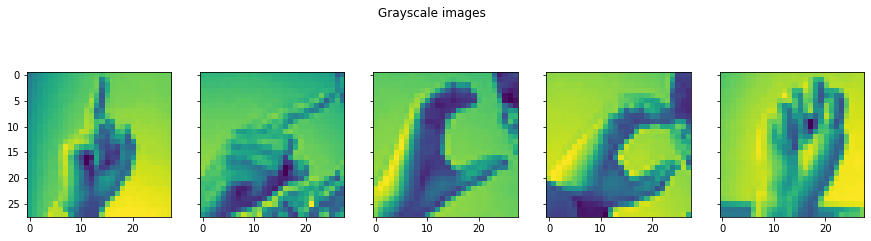

In [6]:
#plt.style.use('rgb')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)

AttributeError: module 'sklearn' has no attribute 'model_selection'